<a href="https://colab.research.google.com/github/MMBAYAR/Spring24_MIS356/blob/main/Handling_missing_data_partI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ppscore

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ppscore as pps

plt.rcParams['font.size'] = 12

# plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams['font.serif'] = ['Times New Roman']

plt.rcParams['figure.figsize'] = [6.3,4.725]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [23]:
df = pd.read_csv( '/content/Auto(ogrenci).csv' )
df = df[ df.columns[1:] ]
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make
0,18.0,NaN,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet
1,NaN,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick
2,18.0,8.0,318.0,150.0,NaN,11.0,70.0,NaN,plymouth
3,16.0,8.0,NaN,NaN,3433.0,NaN,70.0,1.0,amc
4,17.0,8.0,302.0,NaN,3449.0,10.5,70.0,NaN,ford
...,...,...,...,...,...,...,...,...,...
392,27.0,4.0,140.0,NaN,2790.0,15.6,82.0,1.0,ford
393,44.0,4.0,97.0,NaN,2130.0,NaN,82.0,2.0,volkswagen
394,32.0,4.0,NaN,84.0,2295.0,11.6,82.0,1.0,dodge
395,28.0,NaN,120.0,NaN,2625.0,18.6,82.0,NaN,ford


#. Auto.horsepower missing data handling

In [7]:
df.horsepower.unique()

array([130., 165., 150.,  nan, 198., 220., 215., 225., 170.,  95.,  85.,
        46.,  87.,  90., 113., 200., 210., 193.,  88.,  71., 105., 100.,
       153., 180., 110.,  72.,  70.,  76.,  65.,  69.,  60.,  54., 175.,
       208., 160.,  97., 140., 112.,  86.,  92., 137., 167.,  94., 107.,
       145., 230.,  49.,  75., 122.,  67.,  80.,  83.,  78.,  52.,  61.,
       148., 129.,  98., 115.,  53.,  81.,  79., 120., 152., 108.,  96.,
       190., 149.,  89.,  63.,  48.,  66., 139.,  68., 125., 138., 155.,
       142.,  77.,  62., 132.,  84.,  58.,  64., 116.,  74.])

<Axes: xlabel='horsepower', ylabel='Count'>

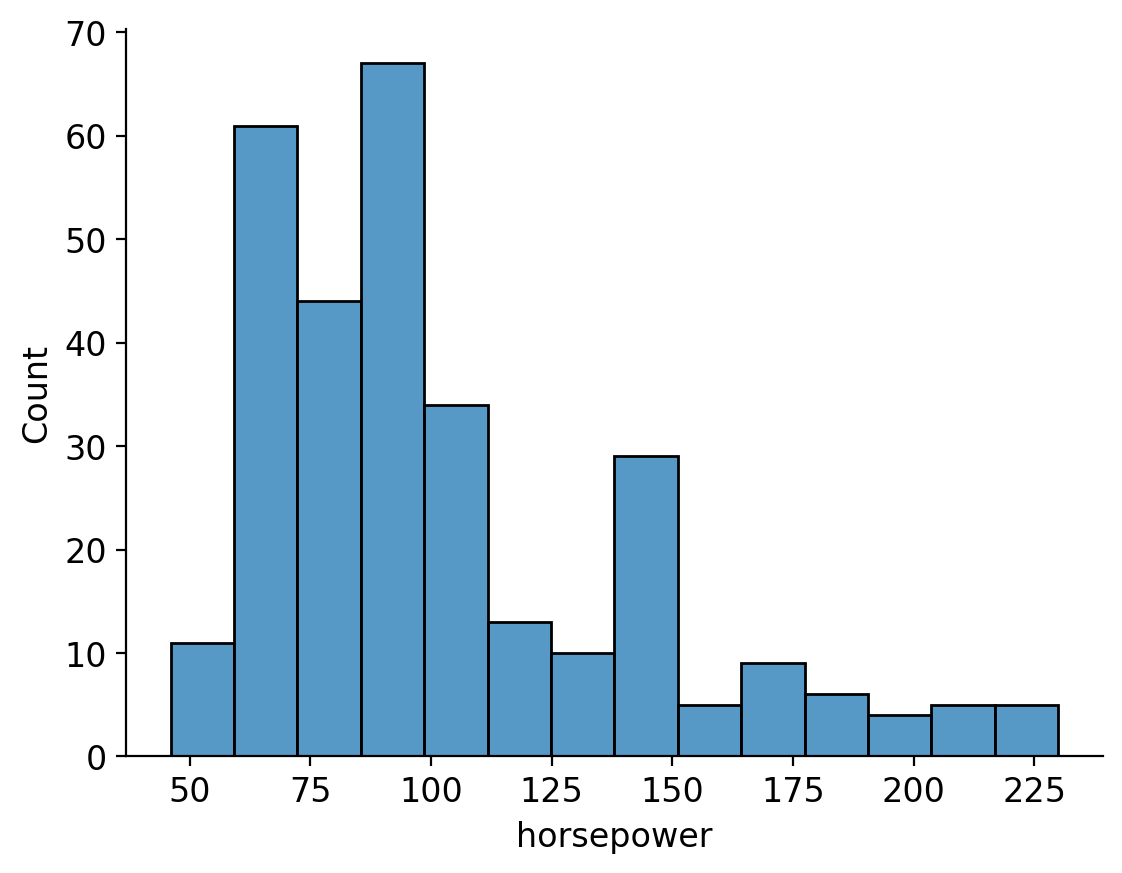

In [8]:
sns.histplot(df.horsepower)

In [9]:
df.horsepower.mode()

0    90.0
Name: horsepower, dtype: float64

In [10]:
df.horsepower.median()

90.0

In [11]:
df.horsepower.mean()

103.31353135313532

##. Filling using the mean value

In [13]:
idx_missing = [ i for i in df[ df.horsepower.isna() ].index ]
idx_full    = [ i for i in df.index if i not in idx_missing ]

In [26]:
#. Filling in missing values using the global mean

#.   Checking the performance on the full indices
from sklearn.metrics import mean_squared_error

mean_squared_error(
    y_true = df.horsepower.loc[ idx_full ],
    y_pred = [ df.horsepower.loc[ idx_full ].mean() for i in idx_full ]
    )

1557.4759555163437

##. Investigating the predictive power score matrix for generating subsets

In [36]:
ppscores = pps.matrix( df ).set_index(['x','y']).ppscore.values

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

<Axes: >

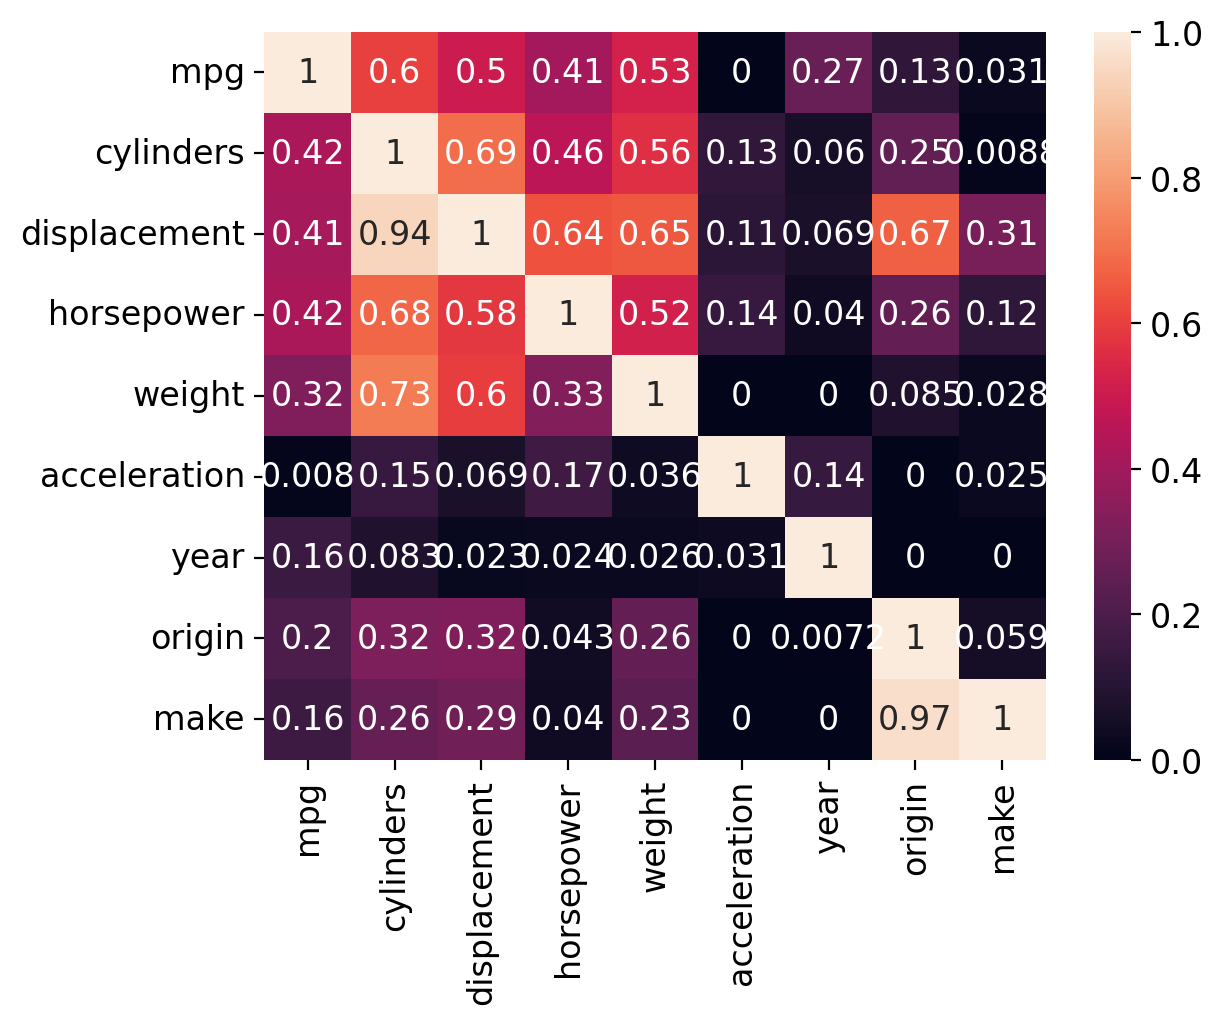

In [40]:
sns.heatmap(
            pd.DataFrame(
                        index = df.columns,
                        columns = df.columns,
                        data = ppscores.reshape( 9,9 )
                        ),

            annot = True
            )

Best explaining data columns are:
* displacement,
* cylinders,
* mpg

### Generating subsets using Auto.displacement & stdev distance

<Axes: xlabel='displacement', ylabel='Count'>

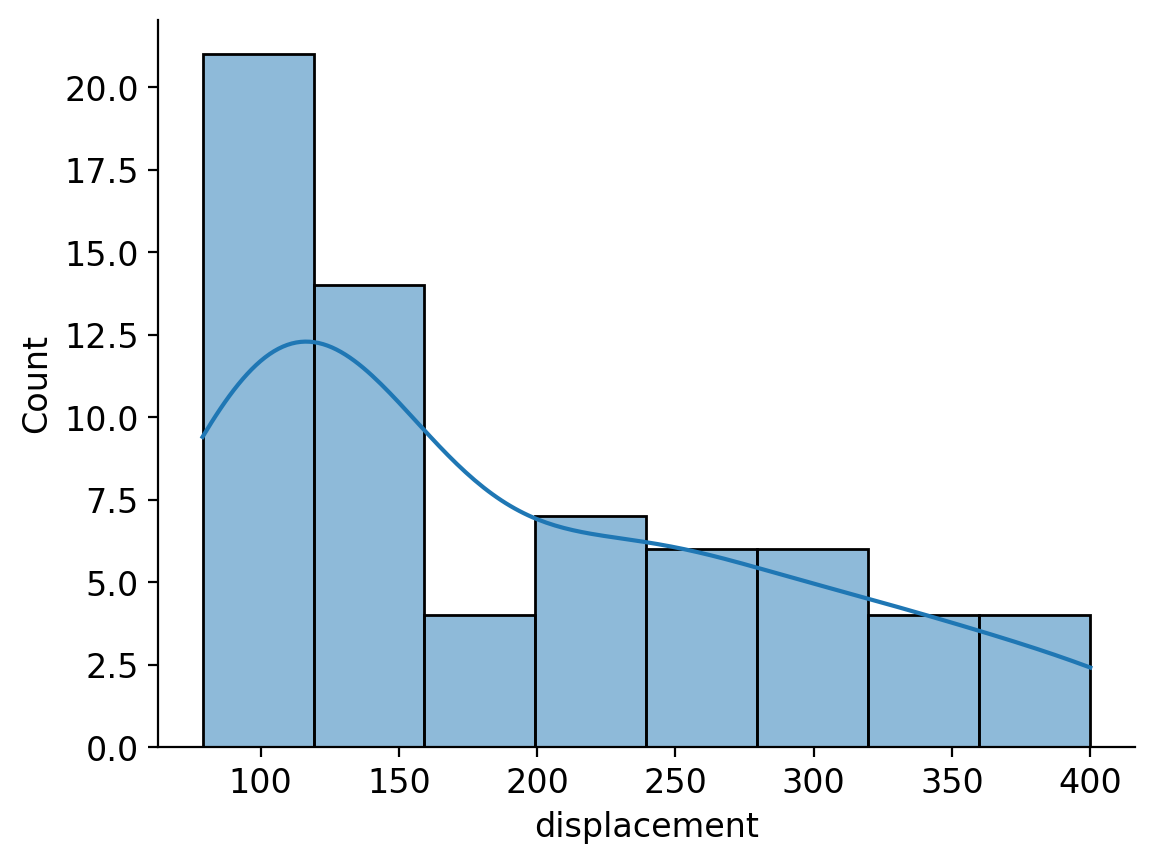

In [46]:
sns.histplot(
df[ (df.displacement.isna() == False) & (df.horsepower.isna() == True) ].displacement,
kde = True,
              )

In [48]:
stdev = df[ (df.displacement.isna() == False) & (df.horsepower.isna() == True) ].displacement.std()

In [51]:
for i in df[ (df.displacement.isna() == False) & (df.horsepower.isna() == True) ].index:
  df.horsepower.loc[i] = \
  df[ abs(df.displacement - df.displacement.loc[i]) <= 0.5*stdev ].horsepower.mean()

<ipython-input-51-a9cd982404ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.horsepower.loc[i] = \


In [59]:
mean_squared_error(
                  y_true = df[ (df.displacement.isna() == False) & (df.horsepower.isna() == False) ].horsepower,
                  y_pred = [
                          df[ abs(df.displacement - df.displacement.loc[i]) <= 0.5*stdev ].horsepower.mean()
                          for i in df[ (df.displacement.isna() == False) & (df.horsepower.isna() == False) ].index
                          ]
                  )

233.0224379595928

### Generating subsets using Auto.displacement & absolute distance

In [60]:
mean_squared_error(
                  y_true = df[ (df.displacement.isna() == False) & (df.horsepower.isna() == False) ].horsepower,
                  y_pred = [
                          df[ abs(df.displacement - df.displacement.loc[i]) <= 10 ].horsepower.mean()
                          for i in df[ (df.displacement.isna() == False) & (df.horsepower.isna() == False) ].index
                          ]
                  )

181.4348565477166

In [64]:
stdev = df[ (df.cylinders.isna() == False) & (df.horsepower.isna() == True) ].cylinders.std()

1.7009646182125797

In [65]:
for i in df[ (df.cylinders.isna() == False) & (df.horsepower.isna() == True) ].index:
  df.horsepower.loc[i] = \
  df[ abs(df.cylinders - df.cylinders.loc[i]) <= 0.5*stdev ].horsepower.mean()

<ipython-input-65-82c434aaeb70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.horsepower.loc[i] = \


In [66]:
mean_squared_error(
                  y_true = df[ (df.cylinders.isna() == False) & (df.horsepower.isna() == False) ].horsepower,
                  y_pred = [
                          df[ abs(df.cylinders - df.cylinders.loc[i]) <= 0.5*stdev ].horsepower.mean()
                          for i in df[ (df.cylinders.isna() == False) & (df.horsepower.isna() == False) ].index
                          ]
                  )

1301.0982601700657

In [68]:
mean_squared_error(
                  y_true = df[ (df.cylinders.isna() == False) & (df.horsepower.isna() == False) ].horsepower,
                  y_pred = [
                          df[ abs(df.cylinders - df.cylinders.loc[i]) <= 1 ].horsepower.mean()
                          for i in df[ (df.cylinders.isna() == False) & (df.horsepower.isna() == False) ].index
                          ]
                  )

426.6984653991142

In [71]:
df[ (df.mpg.isna() == False) & (df.horsepower.isna() == True) ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make
135,18.0,NaN,NaN,NaN,3613.0,NaN,74.0,NaN,plymouth
187,17.5,NaN,NaN,NaN,NaN,13.0,76.0,1.0,chevrolet
286,17.6,NaN,NaN,NaN,3725.0,13.4,79.0,NaN,ford
